# Recommendation System

# Import Library

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt


## 1. Kaggle Credentials

Digunakan untuk mengakses dataset pada Kaggle. Kedua variabel tersebut kemudian disimpan dalam environment variable dengan bantuan library `os`.

In [2]:

os.environ['KAGGLE_USERNAME'] = 'setyawijayanta'
os.environ['KAGGLE_KEY'] = '08fc4239cbb74502d82dfc0478a34de9'

# 2. Data Collection

Dataset yang digunakan adalah [Indonesia Tourism Destination]
(https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination)
dengan `tourism_with_id.csv` dan `tourism_rating.csv` sebagai dataset.

In [3]:
# Download tourism_with_id.csv dan tourism_rating.csv ke local directory
!kaggle datasets download -d aprabowo/indonesia-tourism-destination -f tourism_with_id.csv -p .
!kaggle datasets download -d aprabowo/indonesia-tourism-destination -f tourism_rating.csv -p .

Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
100% 357k/357k [00:00<00:00, 1.62MB/s]
100% 357k/357k [00:00<00:00, 1.61MB/s]
Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
100% 102k/102k [00:00<00:00, 880kB/s]
100% 102k/102k [00:00<00:00, 876kB/s]


# 3. Data Understanding

Menampilkan masing-masing dataset yaitu `tourism_with_id.csv` dan `tourism_rating.csv` menggunakan library pandas dari format .csv menjadi dataframe.

In [4]:
import pandas as pd

places = pd.read_csv('tourism_with_id.csv')
ratings = pd.read_csv('tourism_rating.csv')

print('Jumlah places: ', len(places.Place_Id.unique()))
print('Jumlah ratings: ', len(ratings.Place_Ratings))


Jumlah places:  437
Jumlah ratings:  10000


## Univariate Exploratory Data Analysis (EDA)

Di sini akan dilakukan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

### Pengecekan informasi variabel

In [5]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


File ini terdiri dari 10 kolom sebagai berikut:

- Place_Id: kolom yang menunjukkan id dari setiap tempat wisata.
- Place_Name: kolom yang menunjukkan nama dari setiap tempat wisata.
- Description: kolom yang menunjukkan deskripsi dari setiap tempat wisata.
- Category: kolom yang menunjukkan kategori dari setiap tempat wisata.
- City: kolom yang menunjukkan kota dimana tempat wisata tersebut berada.
- Price: kolom yang menunjukkan harga tiket masuk ke tempat wisata tersebut.
- Rating: kolom yang menunjukkan rating dari setiap tempat wisata.
- Time_Minutes: kolom yang menunjukkan waktu yang diperlukan untuk mengunjungi tempat wisata tersebut.
- Coordinate: kolom yang menunjukkan koordinat dari setiap tempat wisata.
- Lat: kolom yang menunjukkan latitude dari setiap tempat wisata.
- Long: kolom yang menunjukkan longitude dari setiap tempat wisata.

## Menampilkan sample dataset places.

In [6]:
places.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Melakukan pengecekan deskripsi statistik dataset places dengan fitur describe().

In [7]:
places.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


Berdasarkan output diatas, didapatkan deskripsi statistik yaitu:
1. count: Jumlah sampel data
2. mean: Nilai rata-rata
3. std: Standar deviasi
4. min: Nilai minimum
5. 25%: Kuartil bawah/Q1
6. 50%: Kuartil tengah/Q2/median
7. 75%: Kuartil atas/Q3
8. max: Nilai maksimum

### Dataset Ratings

Pengecekan informasi variabel dari dataset ratings berupa jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


File ini terdiri dari 3 kolom sebagai berikut:

- User_Id: identitas unik dari setiap pengguna.
- Place_Id: identitas unik dari setiap tempat wisata.
- Place_Ratings: penilaian atau rating yang diberikan oleh pengguna terhadap tempat wisata tertentu.

Menampilkan sample dataset ratings.

In [9]:
ratings.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


Melakukan pengecekan deskripsi statistik dataset ratings dengan fitur describe().

In [10]:
ratings.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


### Visualisasi Dataset Ratings

Visualisasi data adalah proses representasi grafis dari informasi dan data. Dengan menggunakan elemen visual seperti grafik, diagram, dan peta, visualisasi data menyediakan cara yang intuitif dan mudah diakses untuk melihat dan memahami tren, anomali, dan pola dalam data. Tujuan utama dari visualisasi data adalah untuk mengkomunikasikan informasi secara jelas dan efisien kepada pengguna, sehingga memudahkan pemahaman, analisis, dan pengambilan keputusan berdasarkan data tersebut

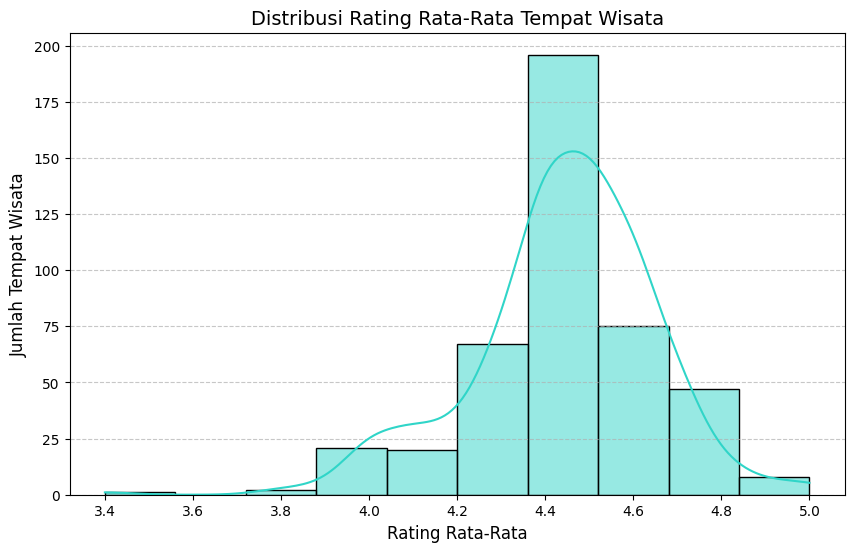

In [11]:
# Plot distribusi rating rata-rata tempat wisata
plt.figure(figsize=(10, 6))
sns.histplot(places['Rating'], bins=10, kde=True, color='#30D5C8')
plt.title('Distribusi Rating Rata-Rata Tempat Wisata', fontsize=14)
plt.xlabel('Rating Rata-Rata', fontsize=12)
plt.ylabel('Jumlah Tempat Wisata', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **4. Data Preparation**

Tahap data preparation merupakan proses transformasi data menjadi bentuk yang dapat diterima oleh model machine learning nanti. Proses data preparation yang dilakukan, yaitu membersihkan data missing value, dan melakukan pengecekan data duplikat.

## Menghapus Kolom yang Tidak Diperlukan

Data yang diperlukan hanya ada pada kolom `Place_Id`, `Place_Name`, dan `Category`, jadi hapus yang lain.

In [12]:
places = places.drop(['Description', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'], axis=1)

## Handle Missing Value

In [13]:
places.isnull().sum()

,0
Place_Id,0
Place_Name,0
Category,0


In [14]:
ratings.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


## Menghapus Data Duplikat

In [15]:
print(f'Jumlah data places yang duplikat: {places.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {ratings.duplicated().sum()}')

Jumlah data places yang duplikat: 0
Jumlah data rating yang duplikat: 79


Menghapus data duplicate

In [16]:
ratings.drop_duplicates(inplace = True)

### TF-IDF Vectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(places['Category'])

tf.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'ibadah',
       'perbelanjaan', 'pusat', 'taman', 'tempat'], dtype=object)

TF-IDF Vectorizer digunakan untuk menemukan representasi fitur yang penting dari setiap kategori destinasi wisata. Alat ini dari library scikit-learn akan mengubah nilai-nilai tersebut menjadi vektor dengan menggunakan metode fit_transform dan transform, serta melakukan pemecahan data menjadi bagian-bagian yang lebih kecil secara langsung.

Transformasi data tempat pada kolom category menjadi bentuk verktor matriks.

In [18]:
tfidf_matrix = tf.fit_transform(places['Category'])
tfidf_matrix.shape

(437, 10)

Mengubah bentuk vectorizer yaitu vektor menjadi bentuk matriks.

In [19]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678]])

In [20]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=places.Place_Name
).sample(10, axis=0)

,alam,bahari,budaya,cagar,hiburan,ibadah,perbelanjaan,pusat,taman,tempat
Place_Name,,,,,,,,,,
Pecinan Glodok,0.0,0.0,0.0,0.0,0.000000,0.0,0.707107,0.707107,0.000000,0.0
Klenteng Sanggar Agung,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Perpustakaan Nasional,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Lawang Sewu,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Jogja Exotarium,0.0,0.0,0.0,0.0,0.707107,0.0,0.000000,0.000000,0.707107,0.0
Candi Gedong Songo,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Taman Badak,0.0,0.0,0.0,0.0,0.707107,0.0,0.000000,0.000000,0.707107,0.0
Surabaya North Quay,0.0,0.0,0.0,0.0,0.707107,0.0,0.000000,0.000000,0.707107,0.0
Museum Geologi Bandung,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


Proses encoding fitur User_Id pada dataset ratings menjadi array.

In [21]:
user_ids = ratings['User_Id'].unique().tolist()
print('list User_Id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)


list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

Proses encoding fitur Place_Id pada dataset ratings menjadi array.

In [22]:
place_ids = ratings['Place_Id'].unique().tolist()
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

Melakukan mapping atau pemetaan kolom user dan place ke dataset ratings yang berkaitan.

In [23]:
ratings['user'] = ratings['User_Id'].map(user_to_user_encoded)
ratings['place'] = ratings['Place_Id'].map(place_to_place_encoded)


Melakukan pengecekan jumlah user, jumlah tempat, penilaian minimal, dan penilaian maksimal.

In [24]:
users_count = len(user_to_user_encoded)
place_count = len(place_encoded_to_place)

ratings['rating'] = ratings['Place_Ratings'].values.astype(np.float32)

min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print(f'Users Count: {users_count}')
print(f'Places Count: {place_count}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')


Users Count: 300
Places Count: 437
Min rating: 1.0
Max rating: 5.0


# Mengacak dataset ratings.

In [25]:
ratings = ratings.sample(frac=1, random_state=42)
ratings


,User_Id,Place_Id,Place_Ratings,user,place,rating
5315,161,260,2,160,259,2.0
518,17,262,2,16,54,2.0
4362,133,191,5,132,240,5.0
8447,255,156,1,254,241,1.0
9105,274,78,3,273,35,3.0
...,...,...,...,...,...,...
5782,174,296,3,173,154,3.0
5237,159,69,4,158,406,4.0
5437,164,24,5,163,74,5.0
871,28,131,5,27,70,5.0


# Normaliasi

In [26]:
# Periksa struktur dan jenis data rating
if isinstance(ratings, (list, np.ndarray)):
    # Ensure the data has 3 columns for 'User_Id', 'Place_Id', 'Place_Ratings'
    if len(ratings[0]) == 3:
        ratings = pd.DataFrame(ratings, columns=['User_Id', 'Place_Id', 'Place_Ratings'])
    else:
        raise ValueError("Data rating tidak memiliki jumlah kolom yang sesuai (3 kolom diperlukan).")
elif not isinstance(ratings, pd.DataFrame):
    raise TypeError("Data rating harus berupa Pandas DataFrame, array, atau list.")

# Memasitikan kolom Place_Ratings ada
if 'Place_Ratings' not in ratings.columns:
    raise KeyError("Kolom 'Place_Ratings' tidak ditemukan dalam DataFrame.")

# Memasitikan kolom Place_Ratings adalah numeric
ratings['Place_Ratings'] = pd.to_numeric(ratings['Place_Ratings'], errors='coerce')

# Letakkan baris dengan nilai NaN di Place_Ratings
ratings = ratings.dropna(subset=['Place_Ratings'])

# Normalisasikan Place_Ratings dalam kumpulan data rating
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ratings['normalized_rating'] = scaler.fit_transform(ratings[['Place_Ratings']])

# Menampilkan Dataset rating setelah normalisasi
print("Dataset rating setelah normalisasi:")
print(ratings.head())

ratings.describe()

Dataset rating setelah normalisasi:
      User_Id  Place_Id  Place_Ratings  user  place  rating  normalized_rating
5315      161       260              2   160    259     2.0               0.25
518        17       262              2    16     54     2.0               0.25
4362      133       191              5   132    240     5.0               1.00
8447      255       156              1   254    241     1.0               0.00
9105      274        78              3   273     35     3.0               0.50


,User_Id,Place_Id,Place_Ratings,user,place,rating,normalized_rating
count,9921.000000,9921.000000,9921.000000,9921.000000,9921.000000,9921.000000,9921.000000
mean,151.337970,219.486745,3.066929,150.337970,210.404899,3.066929,0.516732
std,86.107089,126.164097,1.380070,86.107089,125.553310,1.380088,0.345017
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,77.000000,109.000000,2.000000,76.000000,101.000000,2.000000,0.250000
50%,151.000000,220.000000,3.000000,150.000000,208.000000,3.000000,0.500000
75%,226.000000,329.000000,4.000000,225.000000,319.000000,4.000000,0.750000
max,300.000000,437.000000,5.000000,299.000000,436.000000,5.000000,1.000000


### Split Data

Membagi dataset menjadi data train dan data test, yaitu sebesar 20% data uji dan 80% data latih.

In [27]:
x = ratings[['user', 'place']].values
y = ratings['rating'].apply(lambda x: (
    x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[160 259]
 [ 16  54]
 [132 240]
 ...
 [163  74]
 [ 27  70]
 [220  63]] [0.25 0.25 1.   ... 1.   1.   0.5 ]


# **5. Modeling**

Tahap pengembangan modeling sistem rekomendasi dilakukan untuk membangun model sistem rekomendasi yang dapat menyarankan destinasi wisata terbaik bagi pengguna tertentu berdasarkan rating atau penilaian mereka terhadap destinasi wisata. Teknik yang digunakan untuk membangun model ini adalah _content-based filtering recommendation_ dan _collaborative filtering recommendation_.

## Model dengan Content-based

Penggunaan teknik _content-based filtering_ dalam sistem rekomendasi bertujuan untuk menyarankan item yang mirip dengan item yang telah disukai pengguna di masa lalu. Teknik ini mempelajari profil minat pengguna baru berdasarkan data dari objek yang telah dinilai oleh pengguna. Dengan menyarankan item yang serupa dengan yang pernah disukai atau sedang dilihat di masa kini, algoritma ini berusaha memberikan rekomendasi yang akurat kepada pengguna. Semakin banyak informasi yang diberikan pengguna, semakin baik akurasi sistem rekomendasi.

### Cosine Similarity

Melakukan perhitungan derajat kesamaan atau similatiry degree antar nama tempat wisata dengan teknik cosine similarity menggunakan library scikit-learn.

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim


array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Mengubah matriks cosine similarity menjadi bentuk dataframe antar nama tempat (destinasi wisata).

In [29]:
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=places.Place_Name, columns=places.Place_Name)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)


Shape: (437, 437)


Place_Name,Monumen Nasional,Kota Tua,Dunia Fantasi,Taman Mini Indonesia Indah (TMII),Atlantis Water Adventure,Taman Impian Jaya Ancol,Kebun Binatang Ragunan,Ocean Ecopark,Pelabuhan Marina,Pulau Tidung,...,Monumen Bambu Runcing Surabaya,House of Sampoerna,Atlantis Land Surabaya,Taman Hiburan Rakyat,Taman Mundu,Museum Mpu Tantular,Taman Bungkul,Taman Air Mancur Menari Kenjeran,Taman Flora Bratang Surabaya,Gereja Perawan Maria Tak Berdosa Surabaya
Place_Name,,,,,,,,,,,,,,,,,,,,,
Kenjeran Park,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Ocean Ecopark,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Kampoeng Tulip,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Museum Perangko,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Museum Sri Baduga,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Gereja Katedral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Curug Bugbrug,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Air Terjun Sri Gethuk,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Masjid Istiqlal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model dengan Collaborative Filtering

Collaborative Filtering adalah teknik merekomendasikan item yang mirip dengan preferensi pengguna yang sama di masa lalu, misalnya berdasarkan penilaian tempat yang telah diberikan oleh seorang pengguna. Sistem akan merekomendasikan tempat berdasarkan riwayat penilaian pengguna tersebut terhadap tempat dan kategorinya.

## Import Library

In [30]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

### Model Rekomendasi

Melakukan pendefinisian kelas RecommenderNet untuk membangun model klasifikasi teks tersebut. Model ini akan memberikan rekomendasi kepada pengguna berdasarkan preferensi atau kecenderungan pengguna di masa lalu. RecommenderNet menggunakan algoritma pembelajaran mesin seperti collaborative filtering atau content-based filtering untuk menentukan rekomendasi yang tepat untuk pengguna.

Parameter yang digunakan dalam model ini adalah:
- users_count: jumlah user yang akan jadi input dimension pada user embedding, tepatnya sebagai jumlah elemen dari vocabulary atau kata-kata yang digunakan dalam input data
- place_count: jumlah tempat yang akan jadi input dimension pada tempat embedding, tepatnya sebagai jumlah elemen dari vocabulary atau kata-kata yang digunakan dalam input data
- embedding_size: ukuran embedding akan jadi output dimension pada user embedding dan tempat embedding, yaitu jumlah fitur yang dihasilkan oleh Embedding layer, yang merupakan hasil pengurangan dimensi dari input data.

Embedding layer ini akan mengubah representasi numerik dari input data menjadi representasi vektor yang lebih bermakna dan dapat dipahami oleh model machine learning.

In [31]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, users_count, place_count, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.users_count = users_count
    self.place_count = place_count
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        users_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.user_bias = layers.Embedding(users_count, 1)
    self.place_embedding = layers.Embedding(
        place_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.place_bias = layers.Embedding(place_count, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

Proses kompilasi atau compile dengan:
- binary crossentropy loss function: loss function untuk menghitung loss pada model klasifikasi biner.
- adam optimizer: algoritma optimisasi yang digunakan untuk mengupdate bobot pada model machine learning secara efisien.
- metrik RMSE (Root Mean Square Error): metrik yang digunakan untuk mengukur seberapa jauh hasil prediksi dari model dari nilai aktual. RMSE dihitung dengan mencari rata-rata dari kuadrat error yang diakumulasikan dari seluruh data.

In [32]:
model = RecommenderNet(users_count, place_count, 50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


Menambahkan callback EarlyStopping yang akan menghentikan training jika tidak ada peningkatan selama 5 epochs.

In [33]:
from keras.callbacks import  EarlyStopping

callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    restore_best_weights=True,
)


Melatih model.

In [34]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[callbacks]
)


Epoch 1/100
992/992 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6948 - root_mean_squared_error: 0.3464 - val_loss: 0.6932 - val_root_mean_squared_error: 0.3494
Epoch 2/100
992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6943 - root_mean_squared_error: 0.3451 - val_loss: 0.6932 - val_root_mean_squared_error: 0.3494
Epoch 3/100
992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6928 - root_mean_squared_error: 0.3434 - val_loss: 0.6931 - val_root_mean_squared_error: 0.3493
Epoch 4/100
992/992 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6919 - root_mean_squared_error: 0.3437 - val_loss: 0.6931 - val_root_mean_squared_error: 0.3493
Epoch 5/100
992/992 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6907 - root_mean_squared_error: 0.3418 - val_loss: 0.6931 - val_root_mean_squared_error: 0.3493
Epoch 6/100
992/992 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6894 - root_mean_squared_error: 0.3393 - val_loss: 0.6932 - val_root_mean_squared_error: 0.3494
Epoch 7/100
992/992 ━━━━━━━━━━━━━━━━━━━━ 3s 2m

Visualisasi grafik data training dan testing untuk masing-masing metrik Root Mean Square Error dan loss function.

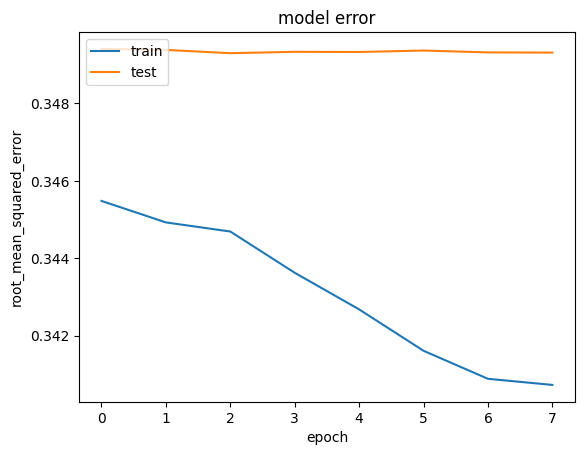

In [35]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


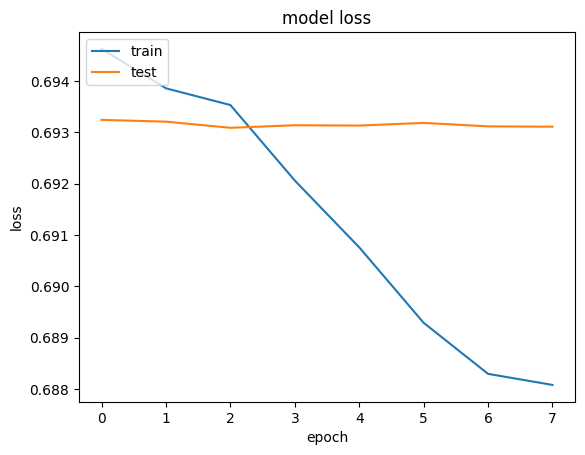

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Evaluasi

## Evaluasi untuk Content-based Filtering Recommendation

Melakukan pendefinisian fungsi place_recommendations untuk menampilkan hasil rekomendasi tempat berdasarkan kesamaan kategori dari sebuah tempat.

In [37]:
def place_recommendations(place_name, similarity_data=cosine_sim_df, items=places[['Place_Name', 'Category']], k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [38]:
place_name = 'Pantai Parangtritis'
places[places.Place_Name.eq(place_name)]

,Place_Id,Place_Name,Category
176,177,Pantai Parangtritis,Bahari


In [39]:
place_recommendations(place_name)

,Place_Name,Category
0,Pantai Pok Tunggal,Bahari
1,Pantai Drini,Bahari
2,Pantai Sadranan,Bahari
3,Pantai Samas,Bahari
4,Pantai Nguluran,Bahari


Berdasarkan hasil rekomendasi di atas, dapat dilihat bahwa sistem yang dibuat berhasil memberikan rekomendasi tempat berdasarkan sebuah tempat, yaitu 'Pantai Parangtritis' dan dihasilkan rekomendasi tempat dengan kategori yang sama, yaitu bahari.

## Evaluasi untuk Collaborative Filtering Recommendation

Melakukan uji coba atau tes rekomendasi tempat yang diberikan. Namun perlu dikertahui terlebih dahulu untuk variabel khusus orang yang belum pernah mengunjungi tempat tersebut (belum memberikan rating) dengan place_not_rated.

In [40]:
place_df = places
ratings_df = ratings

In [41]:
user_id = ratings_df.User_Id.sample(1).iloc[0]
place_rated = ratings_df[ratings_df.User_Id == user_id]

place_not_rated = place_df[~place_df['Place_Id'].isin(
    place_rated.Place_Id.values)]['Place_Id']
place_not_rated = list(
    set(place_not_rated).intersection(set(place_to_place_encoded.keys()))
)

place_not_rated = [
    [place_to_place_encoded.get(x)] for x in place_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_rated), place_not_rated)
)


Melakukan pengujian prediksi hasil rekomendasi tempat berdasarkan nama tempat dan kategori.

In [42]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('=====' * 8)
print('Place with high ratings from user')
print('-----' * 8)

top_place_user = (
    place_rated.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['Place_Id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.Place_Name + ':', row.Category)

print('-----' * 8)
print('Top 10 place recommendation')
print('-----' * 8)

recommended_place = place_df[place_df['Place_Id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.Place_Name + ':', row.Category)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Showing recommendations for users: 259
Place with high ratings from user
----------------------------------------
Taman Lapangan Banteng: Taman Hiburan
Wisata Kaliurang: Cagar Alam
Taman Buah Surabaya: Taman Hiburan
Taman Ekspresi Dan Perpustakaan: Taman Hiburan
Monumen Tugu Pahlawan: Budaya
----------------------------------------
Top 10 place recommendation
----------------------------------------
Kampoeng Rawa: Cagar Alam
Masjid Nasional Al-Akbar: Tempat Ibadah
Keraton Surabaya: Budaya
Monumen Jalesveva Jayamahe: Budaya
Atlantis Land Surabaya: Taman Hiburan
Taman Mundu: Taman Hiburan
Museum Mpu Tantular: Budaya
Taman Air Mancur Menari Kenjeran: Taman Hiburan
Taman Flora Bratang Surabaya: Taman Hiburan
Gereja Perawan Maria Tak Berdosa Surabaya: Tempat Ibadah


Berdasarkan hasil rekomendasi tempat di atas, dapat dilihat bahwa sistem rekomendasi mengambil pengguna acak , lalu dilakukan pencarian tempat dengan rating terbaik dari user tersebut.

- Taman Lapangan Banteng: Taman Hiburan
- Wisata Kaliurang: Cagar Alam
- Taman Buah Surabaya: Taman Hiburan
- Taman Ekspresi Dan Perpustakaan: Taman Hiburan
- Monumen Tugu Pahlawan: Budaya

Selanjutnya, sistem akan menampilkan 10 daftar tempat yang direkomendasikan berdasarkan kategori yang dimiliki terhadap data pengguna acak tadi. Dapat dilihat bahwa sistem merekomendasikan beberapa tempat dengan kategori yang sama, seperti

- Kampoeng Rawa: Cagar Alam
- Masjid Nasional Al-Akbar: Tempat Ibadah
- Keraton Surabaya: Budaya
- Monumen Jalesveva Jayamahe: Budaya
- Atlantis Land Surabaya: Taman Hiburan
- Taman Mundu: Taman Hiburan
- Museum Mpu Tantular: Budaya
- Taman Air Mancur Menari Kenjeran: Taman Hiburan
- Taman Flora Bratang Surabaya: Taman Hiburan
- Gereja Perawan Maria Tak Berdosa Surabaya: Tempat Ibadah

# **6. Kesimpulan**

Sistem berhasil melakukan rekomendasi baik dengan pendekatan _content-based filtering_ maupun _collaborative filtering_. _Collaborative filtering_ membutuhkan data penilaian tempat dari pengguna, sedangkan pada _content-based filtering_, data rating tidak dibutuhkan karena sistem akan merekomendasikan berdasarkan konten tempat tersebut, yaitu kategori.

